In [135]:
import numpy as np

In [159]:
N = 300
n_var = 0.1

def get_sign(n):
    if n>0:
        return 1
    if n<0:
        return -1

s = [get_sign(n) for n in np.random.randn(N, 1)]
n = np.sqrt(n_var)*np.random.randn(len(s), 1)

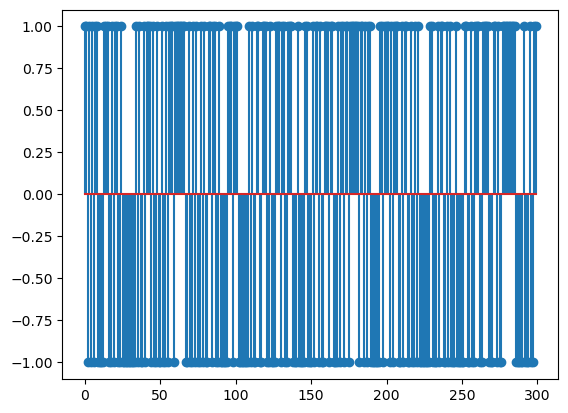

In [160]:
import matplotlib.pyplot as plt
import numpy as np

plt.stem(s)
plt.show()

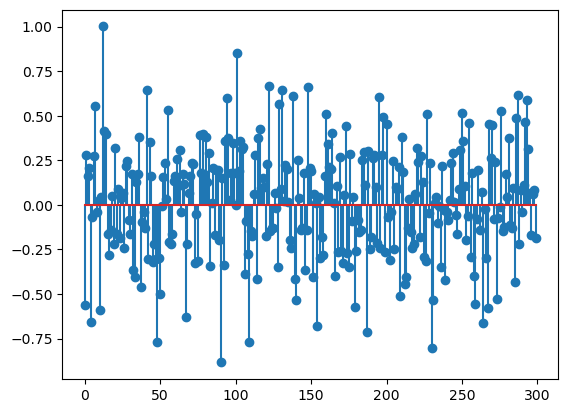

In [161]:
import matplotlib.pyplot as plt
import numpy as np

plt.stem(n)
plt.show()

In [162]:
h = np.array([1, 1.5]).T
r = np.convolve(h, s)

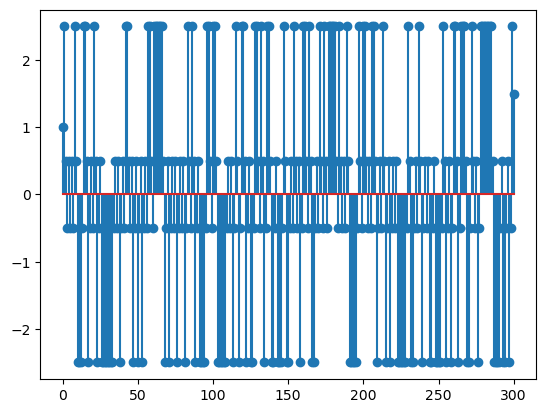

In [163]:
import matplotlib.pyplot as plt
import numpy as np

plt.stem(r)
plt.show()

In [164]:
from operator import add
X = list(map(add, r, n) )


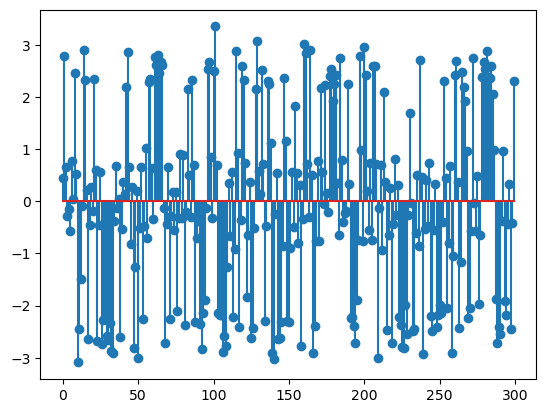

In [165]:
plt.stem(X)
plt.show()

In [197]:
rx0 = np.mean(np.multiply(X, X))
rx1 = np.mean(np.multiply(X[:-1], X[1:]))
rx2 = np.mean(np.multiply(X[:-2], X[2:]))
Rx = [[rx0, rx1, rx2], [rx1, rx0, rx2], [rx2, rx1, rx0]]
print(Rx)

[[3.274540709435001, 1.4681126325685494, 0.05670513157157579], [1.4681126325685494, 3.274540709435001, 0.05670513157157579], [0.05670513157157579, 1.4681126325685494, 3.274540709435001]]


In [198]:
pxd_0 = np.mean((np.multiply(np.array(s).T, X[1:len(s)])))
pxd_1 = np.mean(np.multiply(np.array(s[:-1]).T, X[1:len(s[:-1])])) ###overlap add
pxd_2 = np.mean(np.multiply(np.array(s[:-2]).T, X[2:len(s[:-2])])) ###overlap add
pxd = [pxd_0, pxd_1, pxd_2]
print(pxd)

[0.006619387267809261, 0.007522171371947887, 0.0085282079362669]


In [199]:
w = np.inner(np.linalg.inv(Rx), pxd)
print(w)

[0.00121934 0.0017191  0.00181254]


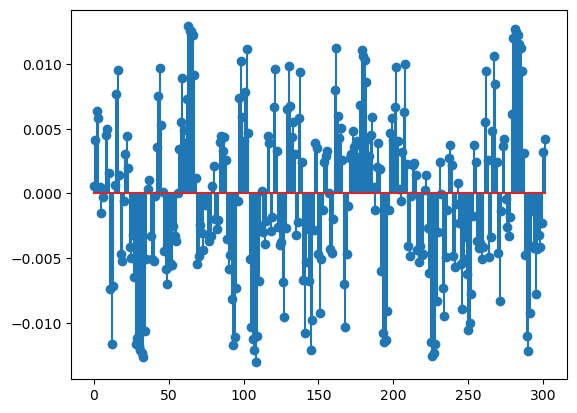

In [200]:
y = np.convolve(w, np.array(X)[:,0])
plt.stem(y)
plt.show()